# Text Review Data Exploration
In this project, we'll explore Kaggles' Women's E-commerce Clothing store text review dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

## Data

In [2]:
file = r'''C:\Projects\datasets\Womensclothingreviews.csv'''
data = pd.read_csv(file)

get the number of rows and features along with the data typesof each column. 

In [3]:
print (data.shape)

(23486, 11)


In [4]:
data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


We performed minor data manipulation, to create a data set only on the features we want.We modified feature names, used the desribe() method to perform a simple data analysis and we also checked on any values that are missing. 

In [6]:
ndata = data[['Age','Rating','Recommended IND','Division Name','Department Name','Class Name']]
ndata.columns = ['Age', 'Rating', 'Recommended', 'Div_name','Department','class']
ndata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0


In [7]:
missing = ndata.isnull().sum().sort_values(ascending=False)
print ('Total missing values:\n',missing)

Total missing values:
 class          14
Department     14
Div_name       14
Recommended     0
Rating          0
Age             0
dtype: int64


## Exploration of the categorical features

### Div_name

In [8]:
var = 'Div_name'
C_data = ndata[var].value_counts()
var + ' column information:\n',C_data

('Div_name column information:\n', General           13850
 General Petite     8120
 Initmates          1502
 Name: Div_name, dtype: int64)

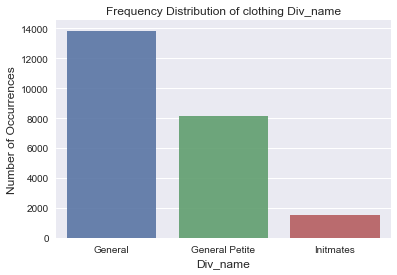

In [9]:
sns.barplot(C_data.index, C_data.values, alpha=0.9)
plt.title('Frequency Distribution of clothing ' + var)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(var, fontsize=12)
plt.show()

###  Department

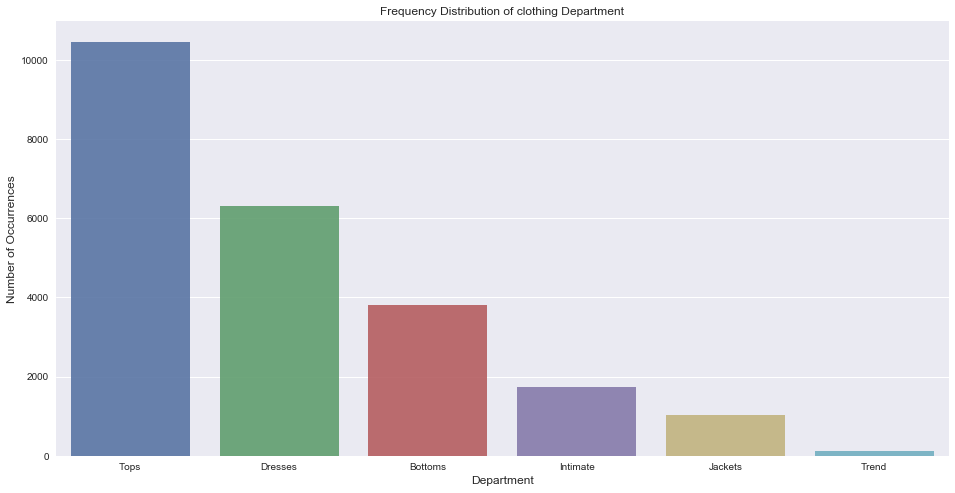

In [10]:
var = 'Department'
C_data = ndata[var].value_counts()
var + ' column information:\n',C_data
plt.subplots(figsize=(16, 8))
sns.barplot(C_data.index, C_data.values, alpha=0.9)
plt.title('Frequency Distribution of clothing ' + var)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(var, fontsize=12)
plt.show()

### Class

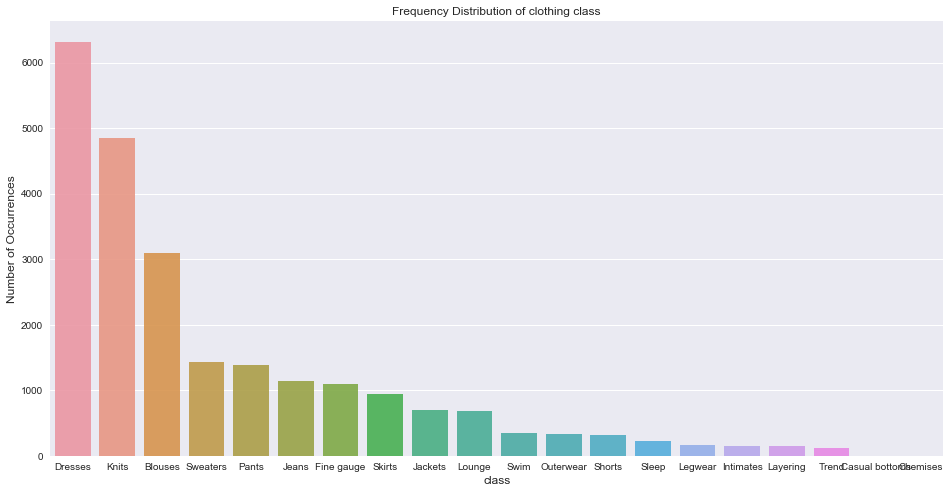

In [11]:
var = 'class'
C_data = ndata[var].value_counts()
var + ' column information:\n',C_data
plt.subplots(figsize=(16, 8))
sns.barplot(C_data.index, C_data.values, alpha=0.9)
plt.title('Frequency Distribution of clothing ' + var)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(var, fontsize=12)
plt.show()

## Age Distribution

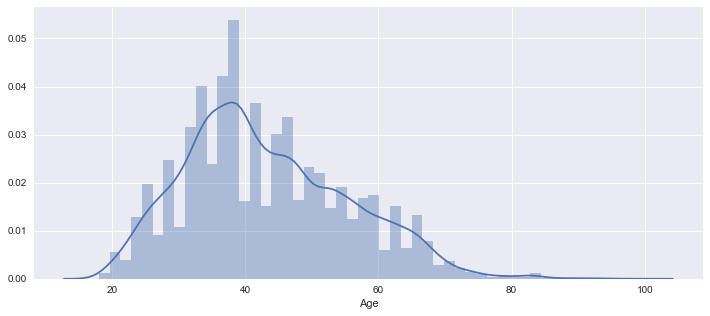

In [12]:
plt.subplots(figsize=(12, 5))
fig2 = sns.distplot(ndata['Age'])
plt.show()

## Other Visuals
Firstly, a Box plot showing if the review recommended the product or not depending on department.
Secondly, the distribution of age groups based on the ratings (from 1-5) they give for a product.
Finally, a series of pair plots comparing Age, Rating and Recommended to each other.

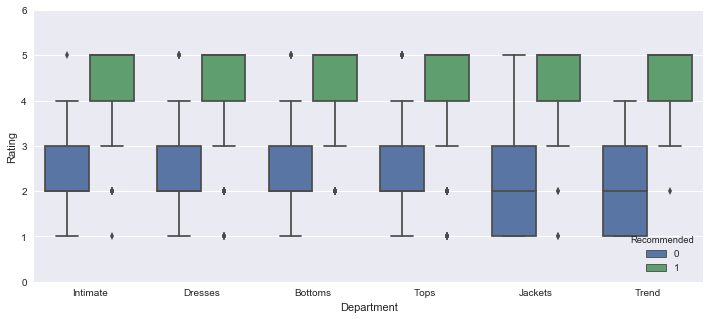

In [13]:
plt.subplots(figsize=(12, 5))
fig3= sns.boxplot(x="Department", y="Rating",hue= 'Recommended',data=ndata)
plt.ylim(0,6)
plt.show()

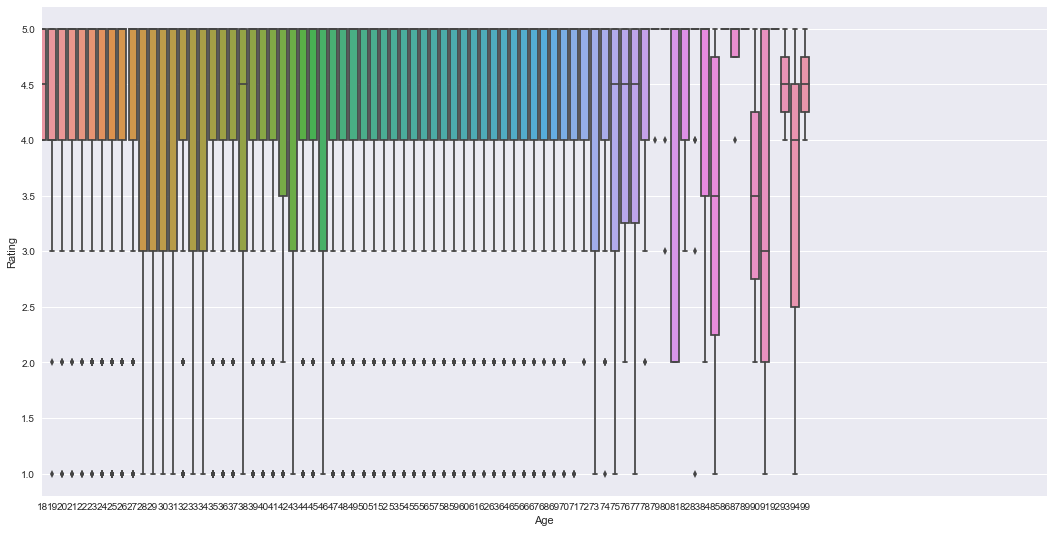

In [15]:
var = 'Rating'
sc = pd.concat([ndata['Age'], ndata[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 9))
fig = sns.boxplot(y=var, x="Age", data=sc)
fig.axis(xmin=0, xmax=100);

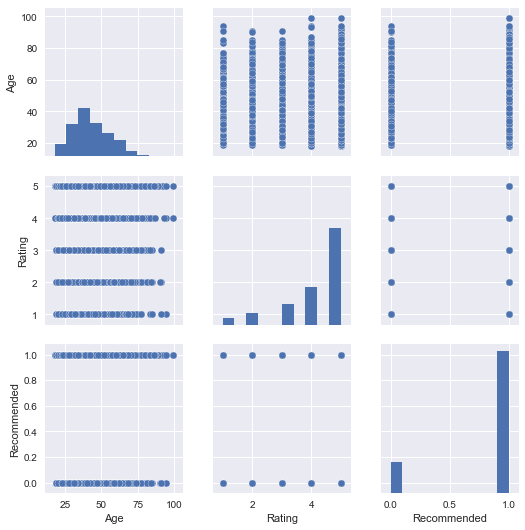

In [16]:
sns.pairplot(ndata[['Age', 'Rating', 'Recommended']], size = 2.5)
plt.show()

This concludes the data exploration, more areas can be explored to get further insights but we'll leave it here for now.
